# Baye's Rule

## Lesson Outline:

1. Introduction to Probabilities: Basic probability concepts.
2. Bayes' Rule Explanation: Formal introduction to Bayes' Rule.
3. COVID-19 Testing Example: How Bayes' Rule applies to interpreting test results.
4. Visualization: A plot to show the effects of changing test characteristics.
5. Hands-on Exercise: Allow students to experiment with their own parameters.

# Understanding Bayes' Rule

Bayes' Rule describes how to update the probability of an event $A$ based on new evidence $B$. It is given by the following formula:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where:
- $P(A|B)$: The **posterior probability**, or the probability of event $A$ occurring given that $B$ has occurred.
- $P(B|A)$: The **likelihood**, or the probability of observing $B$ given that $A$ is true.
- $P(A)$: The **prior probability**, or the initial probability of event $A$.
- $P(B)$: The **evidence**, or the total probability of observing $B$.

### Example: COVID-19 Testing

Let's apply Bayes' Rule to the case of a **COVID-19 test**. Suppose:
- $P(D)$ is the **prior probability** that a person has COVID-19 (prevalence).
- $P(P|D)$ is the **likelihood** that a person with COVID-19 tests positive.
- $P(P)$ is the total probability that anyone tests positive.

Using Bayes' Rule, we calculate the **posterior probability**:

$$
P(D|P) = \frac{P(P|D) \cdot P(D)}{P(P)}
$$

Where:
- $P(D|P)$ is the probability that the person has COVID-19 given a positive test result.
- $P(P|D)$ is the probability that the person tests positive given they have COVID-19 (True Positive Rate).
- $P(D)$ is the prior probability that a person has COVID-19.
- $P(P)$ is the total probability of a positive test result.

## 3. COVID-19 Testing Example in Korea

### Given Values:
- **Prevalence of COVID-19 in Korea** $(P(A)$): Let's assume about **0.5%** of people have COVID-19 (this will change over time).
- **True Positive Rate** $(P(B|A)$): The probability that a test correctly identifies someone with COVID-19. We'll assume this is **95%**.
- **False Positive Rate** $(P(B|\neg A)$): The probability that the test incorrectly identifies someone as having COVID-19 when they don't. We'll assume this is **5%**.

Let’s calculate the probability of having COVID-19 given a **positive test result** using Bayes' Rule.

---

## 4. Applying Bayes' Rule in Python

Let’s calculate $P(A|B)$ using the values above.

In [31]:
# Given probabilities

true_positive_rate = 0.95
false_negative_rate = 0.05

p_c1 = 0.005 # P(A)
p_c0 = 1 - p_c1
p_t1_c1 = true_positive_rate # P(B|A) (True positive rate)
p_t1_c0 = false_negative_rate  # P(B|-A)
p_t0_c1 = (1 - p_t1_c1) # P(-B|A)
p_t0_c0 = (1 - p_t1_c0) # P(-B|-A)

# Step 1: Calculate P(positive); P(B)
p_t1 = p_t1_c1 * p_c1 + p_t1_c0 * p_c0

# A:c1
# B:t1
# Step 2: Apply Bayes' Rule
# P(B | A) = P(A|B) * P(B) / P(A)
p_c1_t1 = (p_t1_c1 * p_c1) / p_t1

# Output the result
print(
    f"""
{p_c1=}
{p_c0=}
{p_t1_c1=}
{p_t1_c0=}
{p_t0_c1=}
{p_t0_c0=}
{p_t1=}
{p_c1_t1=}
"""
)


p_c1=0.005
p_c0=0.995
p_t1_c1=0.95
p_t1_c0=0.05
p_t0_c1=0.050000000000000044
p_t0_c0=0.95
p_t1=0.0545
p_c1_t1=0.0871559633027523



With the given values, we can calculate the probability that a person has COVID-19 given that they tested positive. This is the **posterior probability**.

Let’s check the result and see what it tells us about the reliability of the test.

---

## 5. Visualizing the Impact of Test Characteristics

The probability $P(A|B)$ is sensitive to the values of $P(B|A)$ and $P(B|\neg A)$. Let’s visualize how changing the **false positive rate** and **true positive rate** affects the results.

(10000,) (1, 10000)


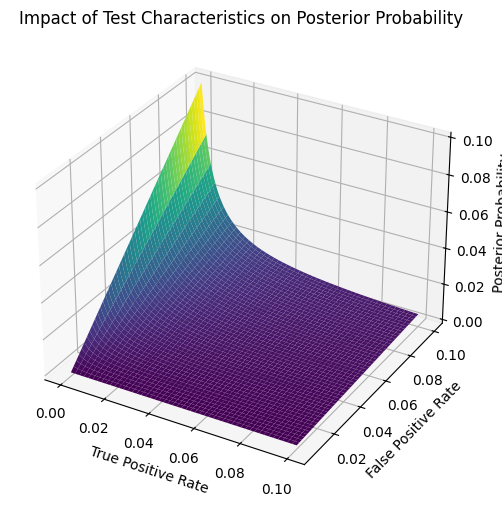

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Vary the false positive rate and true positive rate
    # Range for false positive rate (1% to 10%)
    # Range for true positive rate (80% to 100%)
resolution = 10000
# Prepare a grid to calculate probabilities
true_positive_rate = np.linspace(0, 0.1, resolution)
false_positive_rate = np.linspace(0.005, 0.1, resolution)
# Actual      True     | False
# Predicted            |
#      True  TP        | FP
#     False  FN        | TN

#   Everyone = Covid + No Covid
#      Covid = Covid & Test True + Covid & Test False
#   No Covid = No Covid & Test True + Covid & Test False

# P(E) = 1 = P(C) + P(-C)
# P(C) = P(C|T) + P(C|-T)
# P(T) = P(T|C) + P(T|-C)
# P(T|C) -> TP => P(T|-C) 1-TP = FP
# P(-T|-C) -> TN => P(-T|C) 1-TN = FN


# Calculate posterior probabilities for each combination of rates

p_c1 = 0.005 # P(A)
p_c0 = 1 - p_c1
p_t1_c1 = true_positive_rate # P(B|A) (True positive rate)
p_t1_c0 = false_positive_rate  # P(B|-A)
p_t0_c1 = (1 - p_t1_c1) # P(-B|A)
p_t0_c0 = (1 - p_t1_c0) # P(-B|-A)


# Step 1: Calculate P(positive); P(B)
p_t1 = p_t1_c1 * p_c1 + p_t1_c0 * p_c0

# A:c1
# B:t1
# Step 2: Apply Bayes' Rule
# P(B | A) = P(A|B) * P(B) / P(A)
p_c1_t1 = (p_t1_c1 * p_c1)[:, np.newaxis] * (1 / p_t1)[np.newaxis, :]

print((p_t1_c1 * p_c1).shape, ((1 / p_t1)[np.newaxis, :]).shape)

posterior_probs = p_c1_t1

# Plotting
X, Y = np.meshgrid(true_positive_rate, false_positive_rate)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, posterior_probs, cmap='viridis')

ax.set_xlabel('True Positive Rate')
ax.set_ylabel('False Positive Rate')
ax.set_zlabel('Posterior Probability')
ax.set_title('Impact of Test Characteristics on Posterior Probability')

plt.show()

The 3D surface plot shows how the **posterior probability** of having COVID-19 (given a positive test result) varies depending on the **true positive rate** and **false positive rate**. Notice that when the false positive rate increases, the posterior probability decreases, even if the true positive rate is high.

---

## 6. Hands-On Exercise: Changing Parameters

Now that we have a solid understanding of how Bayes' Rule works, let’s allow you to experiment with different test characteristics. You can adjust the **prevalence of disease**, the **true positive rate**, and the **false positive rate** to see how the result changes.

Feel free to update the values in the cells below to explore the effects.



In [54]:
# Hands-on exercise: Let the student change the values of prevalence, true positive, and false positive rates
P_disease_input = 0.005   # Default prevalence: 0.5%
P_positive_given_disease_input = 0.95   # Default true positive rate: 95%
P_positive_given_no_disease_input = 0.05   # Default false positive rate: 5%

# Recalculate using Bayes' Rule with user-defined parameters
P_no_disease_input = 1 - P_disease_input
P_positive_input = (P_positive_given_disease_input * P_disease_input) + (P_positive_given_no_disease_input * P_no_disease_input)
P_disease_given_positive_input = (P_positive_given_disease_input * P_disease_input) / P_positive_input

P_disease_given_positive_input

0.0871559633027523

You can now experiment with different values for the prevalence of the disease, the true positive rate, and the false positive rate. This will allow you to see how the test's reliability and the population's disease rate influence the final probability.

---

## Conclusion

In this lesson, we:
- Learned about basic probability concepts and Bayes' Rule.
- Applied Bayes' Rule to a real-world problem (COVID-19 testing) to calculate the probability of having the disease given a positive test result.
- Visualized the impact of different test characteristics (true positive and false positive rates) on the posterior probability.
- Encouraged hands-on exploration of test parameters.

By using Bayes' Rule, we can make better-informed decisions based on probabilistic evidence, which is essential in fields like medical testing, finance, and machine learning.

---

**Next Steps:**
- You can apply this framework to other real-world problems, such as spam email detection, fraud detection, or even self-driving cars.


# Interactive Exploration of Bayes' Rule

In this interactive lesson, you can adjust the following parameters:
- **Prevalence of COVID-19** (How common is the disease in the population?)
- **True Positive Rate** (How accurate is the test at detecting the disease?)
- **False Positive Rate** (How likely is the test to incorrectly identify someone as having the disease?)

As you change these parameters, you will see how the **posterior probability** (the probability of having the disease given a positive test) changes.

---

## Adjust the Parameters

Let's start by setting up the interactive sliders for the values we want to explore.

In [ ]:
import ipywidgets as widgets
from ipywidgets import interactive

# Default values
default_prevalence = 0.005  # 0.5% of population
default_true_positive = 0.95  # 95% sensitivity
default_false_positive = 0.05  # 5% false positive rate

# Function to calculate and display the posterior probability
def calculate_bayes(prevalence, true_positive_rate, false_positive_rate):
    # Step 1: Define the probabilities
    P_disease = prevalence  # Prevalence of the disease
    P_positive_given_disease = true_positive_rate  # True positive rate
    P_positive_given_no_disease = false_positive_rate  # False positive rate
    
    # Step 2: Calculate the total probability of a positive test (P(B))
    P_no_disease = 1 - P_disease
    P_positive = (P_positive_given_disease * P_disease) + (P_positive_given_no_disease * P_no_disease)
    
    # Step 3: Apply Bayes' Rule to calculate the posterior probability (P(A|B))
    P_disease_given_positive = (P_positive_given_disease * P_disease) / P_positive
    
    # Display the result
    return f"Posterior Probability (P(Disease|Positive Test)): {P_disease_given_positive:.4f}"

# Set up sliders for interactive parameters
prevalence_slider = widgets.FloatSlider(
    value=default_prevalence,
    min=0.0001,
    max=0.1,
    step=0.0001,
    description="Prevalence:",
    continuous_update=False
)

true_positive_slider = widgets.FloatSlider(
    value=default_true_positive,
    min=0.5,
    max=1.0,
    step=0.01,
    description="True Positive Rate:",
    continuous_update=False
)

false_positive_slider = widgets.FloatSlider(
    value=default_false_positive,
    min=0.0,
    max=0.1,
    step=0.001,
    description="False Positive Rate:",
    continuous_update=False
)

# Set up the interactive widget
interactive_plot = interactive(calculate_bayes, 
                               prevalence=prevalence_slider, 
                               true_positive_rate=true_positive_slider, 
                               false_positive_rate=false_positive_slider)

# Display the interactive widgets
display(interactive_plot)


### Explanation of the Code:

1. Sliders for Parameters:
    - `prevalence_slider`: Controls the prevalence of the disease in the population (ranging from 0.0001 to 0.1, i.e., 0.01% to 10%).
    - `true_positive_slider`: Controls the true positive rate (the accuracy of the test when the person has the disease, ranging from 50% to 100%).
    `false_positive_slider`: Controls the false positive rate (the probability that a person without the disease tests positive, ranging from 0% to 10%).
2. Bayes' Rule Calculation:
    - The function `calculate_bayes` computes the posterior probability using Bayes' Rule based on the values provided by the sliders.
    - The function returns the computed posterior probability of having the disease given a positive test.
3. Interactive Plot:
    - `interactive()` from `ipywidgets` is used to make the widgets interactive. When the user adjusts any slider, the output will automatically update the calculation and show the new posterior probability.
4. Display:
    - `display(interactive_plot)` makes the interactive widgets visible in the notebook, allowing students to adjust values dynamically.

### How To Use It:

You should now be able to adjust the values of:
- Prevalence to see how the overall disease rate affects the result.
- True Positive Rate to understand how the accuracy of the test affects the posterior probability.
- False Positive Rate to see the impact of false positives (incorrectly identifying a healthy person as positive).

For example, increasing the false positive rate will typically decrease the posterior probability that someone actually has the disease, even if they tested positive.